# Preempting Violent Conflict in Turkish Kurdistan: Descriptive Analysis

In [133]:
# Import packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [134]:
# Read data

all_data = pd.read_csv('ged211.csv')

/Users/cyrus.hatam/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


I am using a large set of disaggregated data called the Uppsala Conflict Data Program (UCDP) Geo-Referenced Event Dataset, which purports to list all known and recorded instances of global violence from 1989 through 2020.

The three variables I am choosing to analyse are the following: 1) time, 2) location, and 3) violence.

1) Time is measured by the start and end dates of violent conflicts, though I will only be focusing solely on start dates in this analysis for the sake of simplicity. In a more comprehensive analysis, I would look at both the start dates of conflicts and their durations as dimensions of time. While dates are technically not continuous variables in this dataset (since they range from 1989 to 2021), they effectively are continuous because thinking about them categorically would be unuseful.

2) Location is measured by latitude and longitude coordinates, which are both continuous variables.

3) Violence is defined by the dataset documentation as any event in which an organized actor directly causes the death of at least one person via armed force. It is categorized into state-based, non-state, and one-sided cases, and measured in terms of the best available estimate of total death counts. In this assignment, I will be only looking at the best available estimate of death counts, which is a continuous variable.

In [135]:
# Filter data, and select key variables: date, geographic coordinates (latitude, longitude), deaths

all_data['date_start'] = pd.to_datetime(all_data['date_start'])
data = all_data[['date_start', 'latitude', 'longitude', 'best']]

2) Run summary statistics for 3 variables of your choice and paste your findings.

a) Report the summary statistics for each continuous variable (Mean, SD, Min, Max, number of 
observations) and tabulate the distribution if binary or categorical (Counts, proportion in each 
category)  (1 point)

In [136]:
# Describe data (date)

data['date_start'].describe()

count                  261864
unique                  11678
top       1994-04-07 00:00:00
freq                      191
first     1989-01-01 00:00:00
last      2020-12-31 00:00:00
Name: date_start, dtype: object

In [137]:
# Describe data (geographic coordinates)

data[['latitude', 'longitude']].describe()

,latitude,longitude
count,261864.000000,261864.000000
mean,25.887871,39.369586
std,14.751878,41.364117
min,-37.813611,-117.300000
25%,14.600630,34.495142
50%,33.340582,37.616667
75%,35.335876,66.889427
max,68.979170,155.896681


In [138]:
# Describe data (deaths)

data['best'].describe()

count    261864.000000
mean         10.275128
std         222.556417
min           0.000000
25%           1.000000
50%           2.000000
75%           5.000000
max       48183.000000
Name: best, dtype: float64

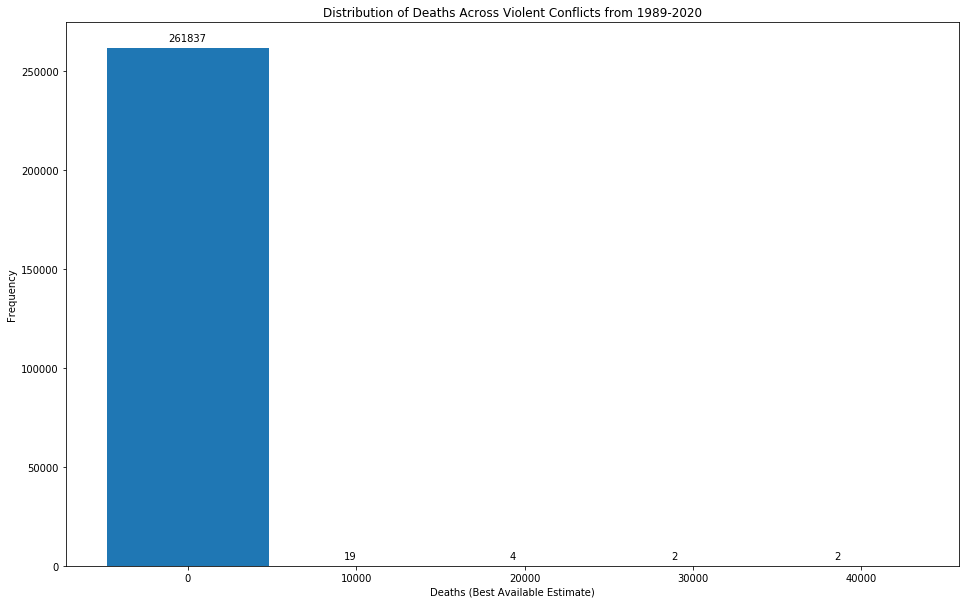

In [139]:
# Distribution of deaths

fig, ax = plt.subplots(figsize = (16, 10))
ax.hist(data['best'], bins = 5, align = "left", density = False)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy = (rect.get_x() + rect.get_width() / 2, height), xytext = (0, 5), textcoords = 'offset points', ha = 'center', va = 'bottom')

plt.ylabel("Frequency")
plt.xlabel("Deaths (Best Available Estimate)")
plt.title("Distribution of Deaths Across Violent Conflicts from 1989-2020")
plt.show()

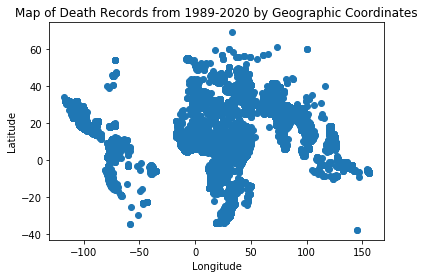

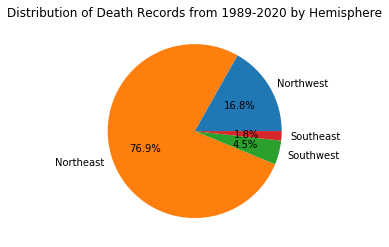

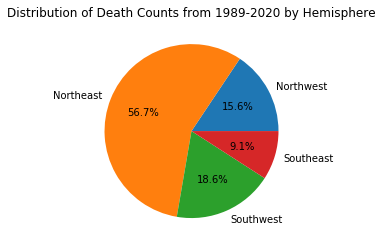

In [140]:
# Useful figures

plt.scatter(x = data['longitude'], y = data['latitude'])
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.title("Map of Death Records from 1989-2020 by Geographic Coordinates")
plt.show()
latitude_north  = data['latitude'] >= 0
latitude_south  = data['latitude'] < 0
longitude_east = data['longitude'] >= 30
longitude_west = data['longitude'] < 30
nw_both_true = latitude_north & longitude_west
ne_both_true = latitude_north & longitude_east
sw_both_true = latitude_south & longitude_west
se_both_true = latitude_south & longitude_east
northwest_rec = 100 * nw_both_true.sum(axis = 0) / len(data['longitude'])
northeast_rec = 100 * ne_both_true.sum(axis = 0) / len(data['longitude'])
southwest_rec = 100 * sw_both_true.sum(axis = 0) / len(data['longitude'])
southeast_rec = 100 * se_both_true.sum(axis = 0) / len(data['longitude'])
geo_dist_rec = [northwest_rec, northeast_rec, southwest_rec, southeast_rec]
fig, ax = plt.subplots()
ax.pie(geo_dist_rec, labels = ["Northwest", "Northeast", "Southwest", "Southeast"], autopct='%1.1f%%')
plt.title("Distribution of Death Records from 1989-2020 by Hemisphere")
plt.show()
data_best = data['best']
geo_dist_count = [np.sum(data_best[nw_both_true]), np.sum(data_best[ne_both_true]), np.sum(data_best[sw_both_true]), np.sum(data_best[se_both_true])]
fig2, ax2 = plt.subplots()
ax2.pie(geo_dist_count, labels = ["Northwest", "Northeast", "Southwest", "Southeast"], autopct='%1.1f%%')
plt.title("Distribution of Death Counts from 1989-2020 by Hemisphere")
plt.show()